# SPIRL Fall 2021 Course -- Week 6 (Oct 26)

Today's topics are:
1. Conda Environments 
2. Package installation
3. Basic Markov-chain Monte Carlo (MCMC) 

There are many MCMC sampler in python, we are only going to go through one today, `PyMC3`.
See this nice article [Samplers demo](https://mattpitkin.github.io/samplers-demo/) by Matthew Pitkin where he have demo on 13 popular sampler in python.

## Readings (optional)

If you find this week's material new or challenging, you may want to read through some or all the following resources while working on your assignment:

**Website**:
* [MCMC: A (very) Beginnner’s Guide](https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial.html)
* [MCMC sampling for dummies](https://twiecki.io/blog/2015/11/10/mcmc-sampling/)
* [Markov Chain Monte Carlo (MCMC)](https://people.duke.edu/~ccc14/sta-663/MCMC.html)
  
**YouTube Video**:
* [Markov Chain Monte Carlo (MCMC) : Data Science Concepts](https://www.youtube.com/watch?v=yApmR-c_hKU)
* [Metropolis - Hastings : Data Science Concepts](https://www.youtube.com/watch?v=yCv2N7wGDCw)

October 26, 2021\
Instructor: Shih-Yun Tang

## Conda Environments 

While `conda` can do a pretty nice job on manage your package's (pkg) version for not having version conflict between each others, problem might still occurs when you have multiple projects. For example, two different projects might need to use differ version of `numpy`. Therefore, creating different **environments (env)** for different projects is very useful. Under different env, you can even run project **A** with python version 3.5 and run project **B** with python version 3.10 on the same machine.

See more detail on 
* [5.2. Conda environments](https://cjtu.github.io/spirl/anaconda_environments.html)
* [Conda official page: Managing environments](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)

Some useful commands (run in your terminal):
- Check created environments (env): `conda env list`

- Create new env: `conda create -n [env name] [pkgs you want to install, separated with space]`.  
Example: `conda create -n researchenv python numpy matplotlib jupyter`.
(create a env call, `researchenv`, and install `python`, `numpy`, `matplotlib`, and `jupyter` pkgs under it)

-  Activate an env (for example the `researchenv`): `conda activate researchenv`
  > if `conda activate` don't work, try `source activate researchenv`. whether use `conda` or `source` depends on how you install in the first place.

- Activate an env: `conda deactivate researchenv`

- Remove an env: `conda remove --name researchenv --all`

In [1]:
# quick demo

## Installing New Packages

There are usually three ways to install new packages in python.
1. via `conda install [pkg names]`
2. via `pip install [pkg names]`
3. installation from **source file** directly (we will talk about it in week 9!)

Which is the best way to install a package depends; thus, best to find it out on their website!
(also, difference OS might get different suggestion on how to install some pkgs.)
In the following section, we see demo on how to install `PyMC3` and `corner`.

### Installing `pyMC3`
Not all, but for some popular and well maintained pkgs, e.g., `numpy`, `pandas`, and `PyMC3`, you can find their fancy and nice documented web page. 

Clink [here](https://docs.pymc.io/en/stable/) and go to the main page of `PyMC3`.
Under the **Installation** section, choose your OS.

> (Below installation commands are updated on Oct. 22, 2021. Might changed in the future.)

For Linux:
```bash
conda install -c conda-forge pymc3 mkl-service
```
For MacOX (M1 chip):
```bash
conda create -c conda-forge -n pymc3_env python=3.9 pymc3
```
For MacOX (Intel chip):
```bash
conda create -c conda-forge -n pymc3_env python=3.9 pymc3 theano-pymc mkl mkl-service
```
For Windows:
```bash
conda create -c conda-forge -n pymc3_env "python=3.8" libpython mkl-service m2w64-toolchain numba python-graphviz scipy
pip install pymc3
```

In [2]:
# run below command to see if the installation works
import pymc3 as pm
print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.11.2


### Installing `corner`

click [here](https://corner.readthedocs.io/en/latest/install.html) to go to `corner` installation guide page.

You will find out that there is no option for `conda install` but only with `pip`!
```bash 
pip install corner
```
> When do `pip install`, make sure you are in the right env that you want it to be installed!

In [27]:
# run below command to see if the installation works
import corner
print(f"Running on corner v{corner.__version__}")

Running on corner v2.2.1


## Markov-chain Monte Carlo (MCMC)
**Markov-chain Monte Carlo (MCMC)** methods is a combination of the **Markov chain** and the **Monte Carlo** method that designed to sample a probability distribution. In a Markov chain, there is a **walker** exploring the unknown parameter space. The walker's each move is independence of it's previous move and that where it MIGHT goes next is randomly choose by the **Monte Carlo** method. However, whether or not it moves to the next state is governed by some algorithms, e.g., Metropolis-Hastings, Gibbs, and Slice algorithms. Those **algorithms** will guid the walker eventually enter a region of space that are the most probable solution of the unknown parameters, i.e., near the peak of the posterior distribution.

## Simple Example with MCMC -- Finding Planet Mass and Radius
Let's start with a simple example with the free-fall data, which contain the time and height of the measurement. In week 2, we tried to use some fitting function to get the values of *g*. However, from the free-fall equation
$$
z(t) = \frac{1}{2}gt^2
$$
and from $F=ma$
$$
g = \frac{GM}{R^2}.
$$
we can drive
$$
z(t) = \frac{1}{2}\frac{GM}{R^2}t^2
$$
where G is the universal gravitational constant (G = 6.674 $\times 10^{-11} m^3/kg/s^2$). So... is it possible that we can say something about the planet mass and radius!?

The answer is **NO**... unless we know a bit more about the two unknown parameters, the prior information of M and R. And here is when Bayes theorem comes in.

The Bayes Theorem tells us:
$$
p(x|y) \propto p(y|x)p(x)
$$
where $p(x|y)$ means the probability of x given the present of y, and $p(y|x)$ is vice versa. Although, all three terms represent probabilities, a more MCMC way to call them are:
$$
{\rm posterior} \propto {\rm (likelihood\ function)} { {\rm (prior\ function)} }
$$

A short story to help you build the intuition for the Bayes theorem:
> One afternoon, you and your friend Lauren are talking about Bayes’ theorem in the living room when your brother, Ben, comes out of his room. You both notice that Ben is wearing a baseball cap and an old worn-out T-shirt. Lauren says, "based on Ben's outfit, I bet he is going to a baseball game". You reply, "Ah, so based on your prior experience, you think baseball caps and T-shirts are likely to be worn to baseball games. So given Ben’s attire, you think there is a good probability that he is going to a baseball game”. Lauren says, “Oh I see! My prior is that I’ve seen baseball caps and T-shirts at baseball games, which informs my likelihood function that I used to predict where Ben is going based on his outfit, which gave me my posterior probability, that Ben is at least 50\% likely to be going to a baseball game!” Ben rolls his eyes, grabs his keys and leaves, wondering why anyone would ruin a perfectly good Saturday talking about stats…
"Anyways… yes, that is a good guess based on your priors, but as Ben’s sister, I know for a fact he is going on a date with his girlfriend and not to a ball game.” Lauren was skeptical of your certainty. “How could you possibly know that?” You eagerly reply, “Well my priors are that 1) Ben always wears baseball caps, 2) That shirt was a gift from his girlfriend for their first-year anniversary, 3) Ben doesn’t like baseball. Therefore, although your likelihood function predicted that Ben had at least a 50\% chance of going to a ball game, my priors are much stronger than yours, so when I say there is less than 1\% chance Ben is going to a baseball game, my posterior probability is stronger – and therefore more likely to be correct – than yours!


### Likelihood function (probability):
$$
\mathcal{L} = exp \left(-\frac{1}{2}\chi^2 \right) \prod \frac{1}{ \sqrt{2 \pi \sigma^2_{z_i}} }
$$
Inside the $\chi^2$ is where you model, $ \frac{1}{2}\frac{GM}{R^2}t^2$, take place.
A simple way to picture this is given your observation data (the $i$ in $\sigma^2_{z_i}$ means each data points), what's the probability (here, likelihood) of a parameter sets your walker steps on.

### Prior function (probability):
The prior knowledge you have on the unknown parameters. Two commonly used prior distributions are the uniform and the normal priors. 

The uniform prior, $\mathcal{U}(lower,upper)$, is simple. If sampled parameter meet the condition, the prior's probability is 1, otherwise, 0. For example, if the Mass (M) has prior $\mathcal{U}(0, 1)$, means that if your walker steps on the space where M=2, your prior give you 0 probability.

The normal (Gaussian) priors. 
$$
\frac{1}{2\pi \sigma^2_{M_0}}exp\left( -\frac{(M-M_0)^2}{2\sigma^2_{M_0}} \right)
$$
Assuming we are able to know the prior of M as $0.30\pm0.015$ Jupiter mass, then $M_0=0.30$ and $\sigma^2_{M_0}=0.015$. The M is where your walker steps on at that step.


<!-- Example below are based on [Motivating Example: Linear Regression](https://docs.pymc.io/en/stable/pymc-examples/examples/getting_started.html#A-Motivating-Example:-Linear-Regression) from the official website of `PyMac3`. -->

In [6]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
print(f"Running on PyMC3 v{pm.__version__}")

plt.style.use('ggplot')
# see other style you can use: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

# read in data
df = pd.read_csv('position_measurement.csv')
df.head()

,time(s),z(m),z_err(m)
0,0.05,0.013114,0.001400
1,0.06,0.022205,0.001962
2,0.07,0.025082,0.002617
3,0.08,0.035259,0.003368
4,0.09,0.042766,0.004213


Text(0, 0.5, 'z (m)')

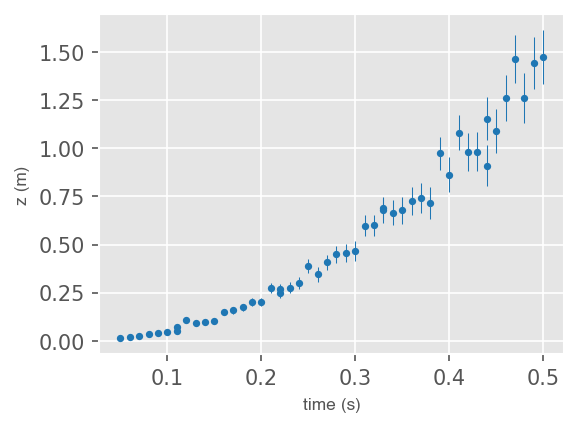

In [7]:
# plot the data
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax1 = plt.subplot(111)

ax1.errorbar(df['time(s)'], df['z(m)'], 
             yerr = df['z_err(m)'], fmt = '.', ms=5, lw=0.5, color='tab:blue')

    
ax1.set_xlabel('time (s)',    size='small', style='normal', family='sans-serif', fontname='Helvetica')
ax1.set_ylabel('z (m)', size='small', style='normal', family='sans-serif', fontname='Helvetica')


In [19]:
import astropy.units as u
from astropy import constants as const

Mj2si = const.M_jup.si.value # constant to transfer Jupiter mass to kg
Rj2si = const.R_jup.si.value # constant to transfer Jupiter radius to m
G_cgs = const.G.si.value 

t = df['time(s)'].to_numpy()
z = df['z(m)'].to_numpy() 
z_err = df['z_err(m)'].to_numpy()

## Run PyMC3
It is easy to setup and run your model in `PyMC3`. You only need to setup your priors function for your unknown parameters and the likelihood function with your model. `PyMC3` is user friendly in a way that they provided lots of build-in probability distribution function.

For a bit more detail, 
1. Initiate the model
2. Setup the model with priors and the likelihood function
3. Let the walkers walk, i.e., let the sampler do its job.

You can find all build-in distribution [here](https://docs.pymc.io/en/stable/api/distributions/continuous.html#pymc3.distributions)

### Let's refresh on what we are doing here:
We want to estimate the planet mass (M) and radius (R) using this model:
$$
z(t) = \frac{1}{2}\frac{GM}{R^2}t^2
$$
with the free-fall data. Other than the free-fall data, we do have some extra (prior) knowledge on M and R. 

* For M, we know M=$0.30\pm0.015$ Jupiter mass. Therefore, we can have a normal distribution prior for M. Moreover, we know we cannot have negative mass.
* For R, you only know that it cannot be larger than 2 Jupiter radius, and cannot have a negative value.

In [28]:
# initial pymc3
planet_model = pm.Model()

# Set up the model (prior and likelihood functions)
with planet_model:
    # set priors for unknown parameters
    mass_j = pm.TruncatedNormal('mass_j', 
                                mu=0.3, 
                                sd=0.015, 
                                lower=0) # TruncatedNormal prior to make sure >0
    radius_j = pm.Uniform('radius_j', 
                          lower=0, 
                          upper=2) # Uniform prior for radius, Make sure 2>R>0
    
    # transfering to SI units
    mass_si = Mj2si * mass_j
    radius_si = Rj2si * radius_j
    
    # Expected value of outcome, aka "the model"
    mu = 0.5 * (G_cgs * mass_si / radius_si**2) * t**2

    # Gaussian likelihood (sampling distribution) of observations, "data"
    obs = pm.Normal('obs', mu=mu, sd=z_err, observed=z)
    
    # no need to setup the posterior function as PyMC3 do that for you!

In [21]:
# setup the number of walkers
walkers = 4 
# setup number of cpu to run (will not effect the result, but only the run time)
cpu_use = 4
# setup number of steps each walkers walk
Nsamples = 1000 # number of useful steps 
Ntune = 2000    # number of tuning steps

# do the sampling (let your walkers walk!)
with planet_model:
    trace = pm.sample(Nsamples, tune=Ntune, chains=walkers, cores=cpu_use, 
                      discard_tuned_samples=True,
                      return_inferencedata=False)
                    #   start = {'mass_j':0.05, 'radius_j':0.9})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [radius_j, mass_j]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 16 seconds.
The acceptance probability does not match the target. It is 0.8828732165819163, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8812865366581761, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


After the sampling is done, your walker's travel history (parameters they stepped on per step) is saved under `trace`. You can access the travel history of each of you walker's steps on different parameters by `trace['par name']`...

In [46]:
trace['mass_j']

array([0.28788099, 0.27938414, 0.3011795 , ..., 0.28733946, 0.32365741,
       0.28534764])

But a more intuitive way to view the `trace` is to use `arviz` pkg.

> ArviZ is a Python package for exploratory analysis of Bayesian models. Includes functions for posterior analysis, data storage, sample diagnostics, model checking, and comparison.

(from [ArviZ](https://arviz-devs.github.io/arviz/) site)

On the left of the plot show the marginalized posterior probability distributions of each of your unknown parameters. On the right, are panels for each unknown parameters showing your walker's travel histories.

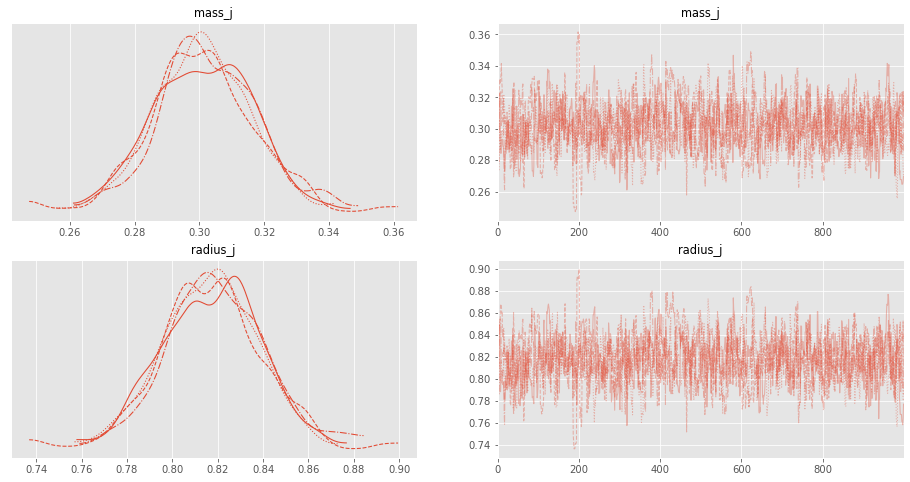

In [47]:
with planet_model:
    az.plot_trace(trace, figsize=(16,8))

You can use the `ArviZ`'s `summary` function to show `trace`'s statistical results.
This is done by the `pandas describe` function in the backend; thus, you can save it out and use it later! 

In [59]:
with planet_model:
    df = az.summary(trace, round_to=2)
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mass_j,0.30,0.02,0.27,0.33,0.0,0.0,665.76,757.93,1.0
radius_j,0.82,0.02,0.78,0.86,0.0,0.0,670.72,642.81,1.0


Finally, plotting the corner plot!

In a corner plot, the counter plots at the lower left are showing the posterior distribution between two of your fitting parameters. The more circular (more 2D gaussian shape) the counter plots are, the nicer you fitting results are! The histograms on top of them are the marginalized posterior probability distributions of each the unknown parameters, i.e., their probability distributions. 

And you see that MCMC do help us recover the correct answer to M and R (the location of the blue lines)!
Wonderful! 
> The blue lines' values are given in `truths` as a dictionary.

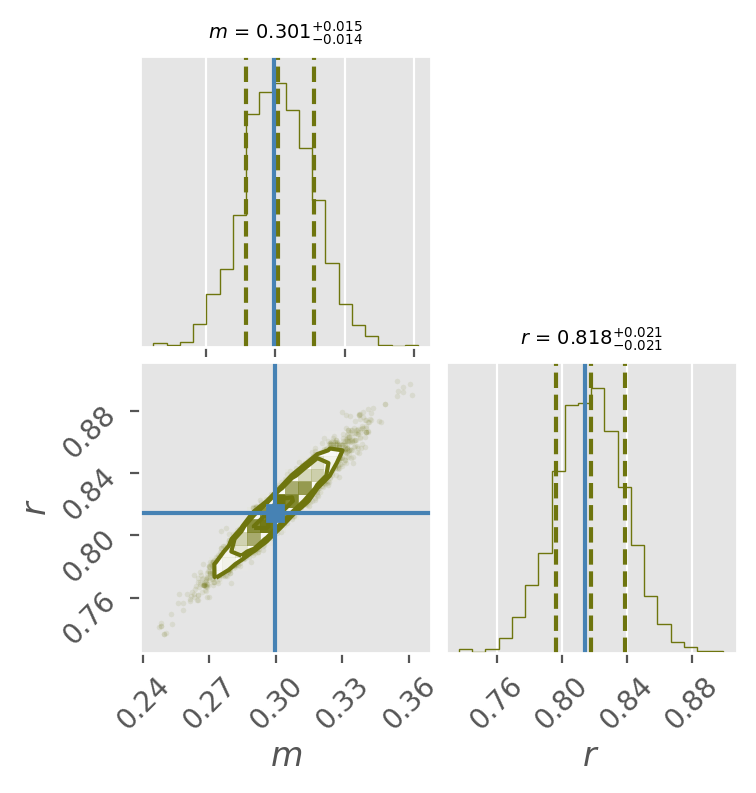

In [60]:
# True values of M and R, which is from the Saturn.
true_R = (58232*u.km).to(u.R_jup).value
true_M = (5.6834e26*u.kg).to(u.M_jup).value

with planet_model:
    f, ax = plt.subplots(2, 2, figsize=(4, 4), facecolor='white', dpi=200, gridspec_kw={'hspace': .05, 'wspace': 0.05})

    fig = corner.corner(trace, quantiles=[0.16, 0.5, 0.84],
                        show_titles=True, color='xkcd:olive', 
                        labels=[r"$m$", r"$r$"], title_kwargs={'size':7}, title_fmt='1.3f',
                        truths=dict(mass_j=true_M, radius_j=true_R),
                        fig=f)


In [ ]:
# set the true values of the model parameters for creating the data
m = 3.5 # gradient of the line
c = 1.2 # y-intercept of the line

# set the "predictor variable"/abscissa
M = 50
xmin = 0.
xmax = 10.
stepsize = (xmax - xmin) / M
x = np.arange(xmin, xmax, stepsize)

# define the model function
def straight_line(x, m, c):
    """
    A straight line model: y = m*x + c
    
    Args:
        x (list): a set of abscissa points at which the model is defined
        m (float): the gradient of the line
        c (float): the y-intercept of the line
    """

    return m * x + c

# seed our random number generator, so we have reproducible data
np.random.seed(sum([ord(v) for v in 'samplers']))

# create the data - the model plus Gaussian noise
sigma = 2.0  # standard deviation of the noise
data = straight_line(x, m, c) + np.random.normal(scale=sigma, size=M)

# plot the data
mpl.rcParams.update(rcparams) # update plot parameters
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, data, 'bo', alpha=0.5, label='data')
ax.plot(x, straight_line(x, m, c), 'r-', lw=2, label='model')
ax.legend()
ax.set_xlim([xmin, xmax])
ax.set_xlabel(r'$x$');

In [ ]:
linear_model = pm.Model()

with linear_model:

    # set priors for unknown parameters
    cmodel = pm.Uniform('c', lower=-10, upper=10) # uniform prior on y-intercept
    mmodel = pm.Normal('m', mu=0, sd=10)       # Gaussian prior on gradient
    
    sigmamodel = sigma # set a single standard deviation
    
    # Expected value of outcome, aka "the model"
    mu = mmodel*x + cmodel

    # Gaussian likelihood (sampling distribution) of observations, "data"
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigmamodel, observed=data)

In [ ]:
Nsamples = 5000 # final number of samples
Ntune = 100    # number of tuning sample

with linear_model:
    # draw 500 posterior samples
    trace = pm.sample(Nsamples, tune=Ntune, return_inferencedata=False, start = {'c':5., 'm':5.0})

In [ ]:
with basic_model:
    az.plot_trace(trace);

In [ ]:
with basic_model:
    display(az.summary(trace, round_to=2))

In [ ]:
df = az.summary(trace, round_to=2)

In [ ]:
trace.varnames

In [ ]:
df.index

In [ ]:
f, ax = plt.subplots(4, 4, figsize=(4+1, 4+1), facecolor='white', dpi=200, gridspec_kw={'hspace': .05, 'wspace': 0.05})

fig = corner.corner(trace, quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, color='xkcd:olive', 
                    labels=[r"$alpha$", r"$beta0$", 'log', 'sigma'], title_kwargs={'size':7}, title_fmt='1.3f',
                    fig=f)



In [ ]:
# plotting 
fig, ax = plt.subplots(facecolor='white', figsize=(4,3), dpi=150)
set_plot_axis_label(ax, 'Avg mercury', 'Count')
ax.set_title('Mercury level in Florida Lakes', size='medium', fontname='Helvetica')

ax.axvline(np.mean(avg_mercury), lw=1, color='black', ls='--')

# random draw result
sample_times = 100000

mean_collection = []
for _ in range(sample_times): 
        avg_mercury_resamp = rng.choice(avg_mercury, len(avg_mercury))
        mean_collection.append(np.mean(avg_mercury_resamp))

ax.hist(mean_collection, histtype='step', color='tab:red', bins=50)
plt.show()

## [Assignment 2] What's the value for $\pi$?

In this assignment, you will need to use the MC method to estimate the values of $\pi$.

Assuming you have a quarter circle with the radius of 1 and a square that share it's edge with the quarter circle's 
radius (see the plot below). 

![Monte-Carlo pi](https://helloacm.com/wp-content/uploads/2015/11/Monte-Carlo01.jpg)

Therefore, we know:
$$
Area_{\rm quarter\ circle} = \pi r^2/4 \\
Area_{\rm square} = r^2
$$
The ratio of the two will be
$$
\frac{Area_{\rm quarter\ circle}}{Area_{\rm square}} = \frac{\pi r^2/4}{r^2} = \frac{\pi}{4}
$$
Rearange the equation and changes the area with the number of points we have:
$$
\pi = 4 \frac{Area_{\rm quarter\ circle}}{Area_{\rm square}} = 4 \frac{N_{\rm quarter\ circle}}{N_{\rm square}}
$$
where $N_{\rm quarter\ circle}$ is the number of points within the quarter circle and $N_{\rm square}$ is the number of points
within the square.

Tips:
1. You will need to generate two arrays with the random generator as the x and y axis of each points.
2. Calculate the number of points within the quarter circle and within the square
3. You get $\pi$ by dividing the two numbers and times 4

**Show that your $\pi$ has $< 1e-4$ difference from `np.pi`**

In [ ]:
# [your code here]
